In [0]:
# Notebook to turn a distance matrix to a list of coordinates

In [0]:
import os
import matplotlib as plt
from scipy.optimize import curve_fit, fmin

In [3]:
## mounting drive lets colab access your google drive account
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Random Projects/Trilatersation of a set of points")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Random Projects/Trilatersation of a set of points'

In [0]:
%run Initial_Lengths_matrix.ipynb

In [6]:
print(D)

[[ 0.    9.5  10.65  9.84  5.13  3.9 ]
 [ 9.5   0.   10.92 14.    5.3  11.1 ]
 [10.65 10.92  0.    4.98 11.8   8.05]
 [ 9.84 14.    4.98  0.   13.    6.12]
 [ 5.13  5.3  11.8  13.    0.    8.15]
 [ 3.9  11.1   8.05  6.12  8.15  0.  ]]


In [7]:
Coordinates=np.zeros((6,2))
print(Coordinates)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [0]:
# x1 = 0,      y1 = 0
x1 = 0
y1 = 0

In [9]:
# x2 = d_1,2 , y2 = 0
x2 = D[0,1]
y2 = 0
Coordinates[1,0]= x2
Coordinates[1,1]= y2
print(Coordinates)

[[0.  0. ]
 [9.5 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]]


In [10]:
# x3 = ((d_1,3)^2 -(d_2,3)^2 +x2^2)/(2*x2)
x3 = ((D[0,2])**2 -(D[1,2])**2 + x2**2)/(2*x2)
# y3 = +/- ((d_1,3)**2-x3**2)**0.5
y3 = ((D[0,2])**2-x3**2)**0.5
Coordinates[2,0]= x3
Coordinates[2,1]= y3
print(Coordinates)

[[0.         0.        ]
 [9.5        0.        ]
 [4.44347895 9.67873932]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


In [0]:
def trilateration(x1,y1,r1,x2,y2,r2,x3,y3,r3):
  A = 2*x2 - 2*x1
  B = 2*y2 - 2*y1
  C = r1**2 - r2**2 - x1**2 + x2**2 - y1**2 + y2**2
  D = 2*x3 - 2*x2
  E = 2*y3 - 2*y2
  F = r2**2 - r3**2 - x2**2 + x3**2 - y2**2 + y3**2
  x = (C*E - F*B) / (E*A - B*D)
  y = (C*D - A*F) / (B*D - A*E)
  return x,y

In [12]:
for i in range(3,D.shape[0]):
  r1 = D[0,i]
  r2 = D[1,i]
  r3 = D[2,i]
  xi,yi = trilateration(x1,y1,r1,x2,y2,r2,x3,y3,r3)
  Coordinates[i,0]= xi
  Coordinates[i,1]= yi
print(Coordinates)

[[ 0.          0.        ]
 [ 9.5         0.        ]
 [ 4.44347895  9.67873932]
 [-0.46970526  9.79579802]
 [ 4.65667895 -2.11206792]
 [-0.93421053  3.72632671]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


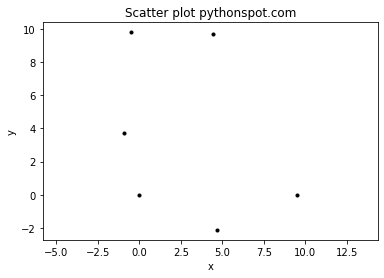

<Figure size 432x288 with 0 Axes>

In [13]:
x=Coordinates[:,0]
y=Coordinates[:,1]
colours = (0,0,0)
area = np.pi*3

# Plot
plt.pyplot.scatter(x, y, s=area, c=colours)
plt.pyplot.title('Scatter plot pythonspot.com')
plt.pyplot.xlabel('x')
plt.pyplot.ylabel('y')
#plt.pyplot.set_aspect('equal', 'box')
plt.pyplot.axis('equal')
plt.pyplot.show()
plt.pyplot.savefig("survey_points.png")

This is nice, but doesnt use all the information avalibable. want to use the entire distance matrix D. Not just the first 3 rows.


In [0]:
# need a function that calculates the distance between two points x=[x1,x2] and y=[y1,y2]
def dist(x,y):
  #print(x)
  d = ( (x[0]-y[0])**2 + (x[1]-y[1])**2 )**0.5
  return d

In [0]:
# need a function that calcualtes D from a set of vectors {[x1,x2], ...}

def DistMatrix(x):
  x=x.reshape(Coordinates.shape)
  #print(x.shape)
  #print(x)
  DM=np.zeros([x.shape[0],x.shape[0]])
  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      DM[i,j]= dist(x[i],x[j])
  return DM


In [75]:
#test dist
disttest= dist(Coordinates[0,:],Coordinates[1,:])
print(disttest)

9.5


In [76]:
Dtest = DistMatrix(Coordinates)
print(Dtest-D)

[[ 0.          0.          0.         -0.03294734 -0.01673395 -0.05835191]
 [ 0.          0.          0.         -0.02313763 -0.01619552 -0.02036733]
 [ 0.          0.          0.         -0.0654215  -0.00726538 -0.02810745]
 [-0.03294734 -0.02313763 -0.0654215   0.         -0.03554527 -0.03278002]
 [-0.01673395 -0.01619552 -0.00726538 -0.03554527  0.         -0.06638095]
 [-0.05835191 -0.02036733 -0.02810745 -0.03278002 -0.06638095  0.        ]]


In [77]:
# fit Coordinates to minimise difference between Dtest and D
#popt, pcov = curve_fit(DistMatrix, xdata = 1, ydata = D, p0=(np.array([2,2])))
def func(x):
  Dtest = DistMatrix(x)
  return np.linalg.norm((D-Dtest).reshape(D.shape[0]*D.shape[1],1))

print(func(Coordinates))



0.18894541523819974


In [78]:
popt = fmin(func, x0=([Coordinates]),ftol=0.0000001,disp=1)

Optimization terminated successfully.
         Current function value: 0.077674
         Iterations: 412
         Function evaluations: 623


In [72]:
print(popt.reshape(Coordinates.shape))

[[ 1.85941670e-05  3.20366532e-05]
 [ 9.49778738e+00 -1.08775096e-04]
 [ 4.48225575e+00  9.67754823e+00]
 [-4.81016510e-01  9.83202492e+00]
 [ 4.65725113e+00 -2.12594932e+00]
 [-9.67275587e-01  3.75488406e+00]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


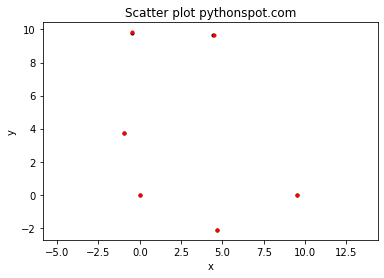

<Figure size 432x288 with 0 Axes>

In [82]:
xi=Coordinates[:,0]
yi=Coordinates[:,1]
coloursi = (0,0,0)
areai = np.pi*3

xf=popt.reshape(Coordinates.shape)[:,0]
yf=popt.reshape(Coordinates.shape)[:,1]
coloursf = (1,0,0)
areaf = np.pi*3

# Plot
#plt.pyplot.scatter(xi, yi, s=areai, c=coloursi, xf, yf, s=areaf, c=coloursf)
plt.pyplot.scatter(xi, yi, s=areai, c=coloursi)
plt.pyplot.scatter(xf, yf, s=areaf, c=coloursf)
plt.pyplot.title('Scatter plot pythonspot.com')
plt.pyplot.xlabel('x')
plt.pyplot.ylabel('y')
#plt.pyplot.set_aspect('equal', 'box')
plt.pyplot.axis('equal')
plt.pyplot.show()
plt.pyplot.savefig("survey_points.png")